# Travail pratique 3
*INF600F - Traitement d'images (H2022, UQÀM)*

* Indiquez ici votre prénom/nom et code permanent.
* Modifiez aussi le nom du notebook pour qu'il ait ce format : `TP3-NOM1_NOM2`, où `NOM{k}` est le nom de famille de chaque membre de votre équipe.

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import tp3
import math
from scipy.signal import convolve2d
from skimage import restoration

# Importation des modules pertinents ici.
# Assurez-vous d'inclure toute autre fonction que vous
# jugez nécessaires ici

# Exercice 1 : Bruit expornentiel

In [2]:
im_ex1 = imageio.imread("tp3_ex1.tiff")

On sélectionne deux zone uniformes pour pouvoir estimer le bruit.

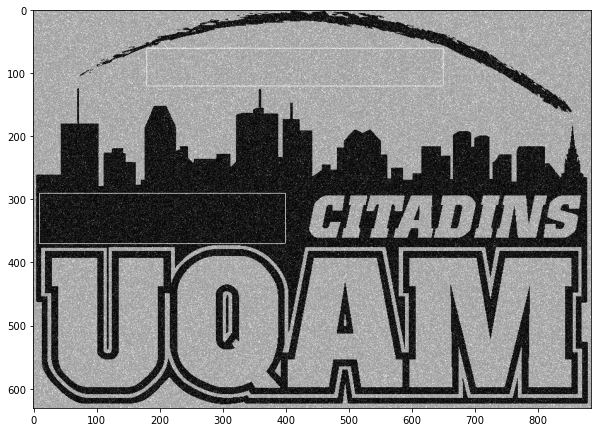

In [3]:
sample_1 = im_ex1[60:120, 180:650]
sample_2 = im_ex1[290:370, 10:400]

# encadrement de l'échantillon 1
ex1_sample = im_ex1.copy()

ex1_sample[60:120, 180] = 255
ex1_sample[60:120, 650] = 255
ex1_sample[60, 180: 650] = 255
ex1_sample[120 ,180:650] = 255

# encadrement de l'échantillon 2
ex1_sample[290:370, 10] = 255
ex1_sample[290:370, 400] = 255
ex1_sample[290, 10:400] = 255
ex1_sample[370, 10:400] = 255


plt.figure(figsize=(10,10))
plt.imshow(ex1_sample, cmap="gray")
plt.show()



On affiche les histogrammes des différents échantillons et de l'image originale.

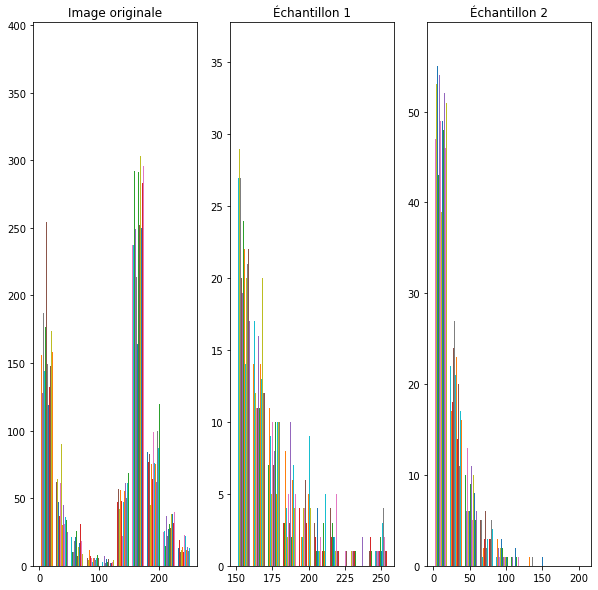

In [4]:
plt.figure(figsize=(10,10))


# image originale
plt.subplot(131)
plt.title("Image originale")
plt.hist(im_ex1)

# échantillon 1
plt.subplot(132)
plt.title("Échantillon 1")
plt.hist(sample_1)

# échantillon 2
plt.subplot(133)
plt.title("Échantillon 2")
plt.hist(sample_2)

plt.show()

On calcule la moyenne, la variance et l'écart type des deux échantillons. Ces mesures seront utiles pour calculer la valeur de `a` pour le bruit exponentiel.

In [17]:

# Estime la moyenne à partir de l'histogramme d'une image.
def estimation_moyenne(sample: dict, nbr_pixel:int) -> float:
    moy = 0.0
    for valeur in sample:
        moy += valeur * (sample[valeur] / nbr_pixel)
    return moy
    

# Estime la variance à partir de l'histogramme d'une image
def estimation_variance(sample:dict, moy:float, nbr_pixel:int)-> float:
    var = 0.0
    for valeur in sample:
        var += (valeur - moy) ** 2 * (sample[valeur] / nbr_pixel)

    return var

In [25]:


# pour l'échantillon 1

# on trouve toutes les valeurs uniques et leurs nombres d'occurences.
k,v = np.unique(sample_1, return_counts=True)
val_uniques = dict(zip(k,v))
nbr_pixel = sample_1.shape[0] * sample_1.shape[1]

s1_moy_e = estimation_moyenne(val_uniques, nbr_pixel)
print(f"Moyenne de l'échantillon 1 : {s1_moy_e}")

s1_std_e = estimation_variance(val_uniques, s1_moy_e, nbr_pixel)
print(f"Variance de l'échantillon 1 : {s1_std_e}")

s1_et_e = math.sqrt(s1_std_e)
print(f"Écart-type de l'échantillon 1 : {s1_et_e}")



28200
Moyenne de l'échantillon 1 : 172.89620567375889
Variance de l'échantillon 1 : 508.39791468110286
Écart-type de l'échantillon 1 : 22.547680915808236


In [26]:
# pour l'échantillon 2

# on trouve toutes les valeurs uniques et leurs nombres d'occurences.
k,v = np.unique(sample_2, return_counts=True)
val_uniques = dict(zip(k,v))
nbr_pixel = sample_2.shape[0] * sample_2.shape[1]

s2_moy_e = estimation_moyenne(val_uniques, nbr_pixel)
print(f"Moyenne de l'échantillon 2 : {s2_moy_e}")

s2_std_e = estimation_variance(val_uniques,s2_moy_e, nbr_pixel)
print(f"Variance de l'échantillon 2 : {s2_std_e}")

s2_et_e = math.sqrt(s2_std_e)
print(f"Écart-type de l'échantillon 2 : {s2_et_e}")


31200
Moyenne de l'échantillon 2 : 23.1363141025641
Variance de l'échantillon 2 : 551.1375402603136
Écart-type de l'échantillon 2 : 23.476318711849043


A partir de ces mesures, on peut calculer `a`.

Pour du bruit exponentiel, peut utiliser les formules suivantes: `z_bar = 1 / a`, `variance = 1 / a^2`. Il faut donc isoler `a` dans ces formules.

Pour l'échantillon 1 :
- Avec la moyenne
>172.9 = 1 / a
>
>a = 1 / 172.0
>
>a = 0.005
- Avec la variance
>508.4 = 1 / a^2
>
>a^2 = 1 / 508.4 
>
>a = 1 / 22.5
>
>a = 0.04

Pour l'échantillon 2 :
- Avec la moyenne
>23.14 = 1 / a
>
>a = 1 / 23.14
>
>a = 0.04
- Avec la variance
>551.14 = 1 / a^2
>
>a^2 = 1 / 551.14
>
>a = 1 / 23.5
>
>a = 0.04

On peut donc voir que `a = 0.04`.

# Exercice 2 : Télescope spatial James-Webb

In [27]:
# Initialisation du télescope
telescope = tp3.JamesWebbSimulator('JACR26038907')

# Importation de l'image de l'étoile HD85506 pour la calibration
im_ex2 = imageio.imread('tp3_ex2.tiff')

In [28]:
# Algorithme de calibration à compléter
def calibration(telescope: tp3.JamesWebbSimulator, image: np.ndarray) -> tp3.JamesWebbSimulator:
    """ Calibration du télescope.
    Parameters
    ----------
    telescope: tp3.JamesWebbSimulator
        Télescope à calibrer
    image: np.ndarray
        Image à utiliser pour la calibration (étoile isolée HD84406)
    Returns
    -------
    telescope: tp3.JamesWebbSimulator
        Télescope calibré    
    """
    ## Pour chaque miroir de votre télescope (`telescope.nb_mirrors`)
    

    for i in range(telescope.nb_mirrors):
        # TODO: Capture d'une image `im1` de l'étoile `HD84406`
        # TODO: Déplacer le miroir d'une distance de -100 pixels.
        # TODO: Capture d'une image `im2` de l'étoile `HD84406`
        # TODO: Comparaison différentielle des images `im_d = im1 - im2` pour déterminer quelle étoile est associée à ce miroir
        # TODO: Segmentation de `im_d` et calcul de la position moyenne de l'étoile pour ce miroir.
        # TODO: Calcul de la correction à appliquer à ce miroir pour le placer au centre du champ de vue.
        psf = np.ones((5,5)) / 25

        im1 = telescope.simulate(image) 
        
        telescope.move_mirror_by(i, -100)

        im2 = telescope.simulate(image)

        diff = im1 - im2

        plt.figure(figsize=(10,10))
        plt.subplot(131)
        plt.imshow(im1)
        plt.subplot(132)
        plt.imshow(im2)
        plt.subplot(133)
        plt.imshow(diff)
  
        plt.show()
        telescope.reset()






    
    # TODO: Appliquer la correction pour chaque miroir
       
    return telescope

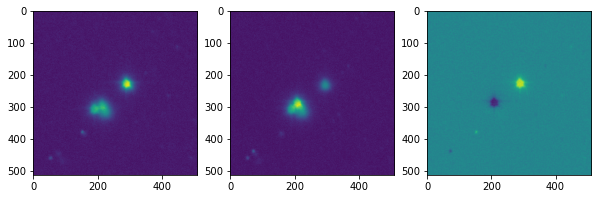

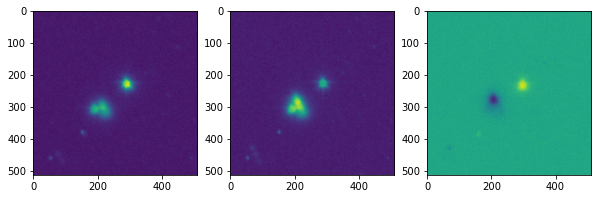

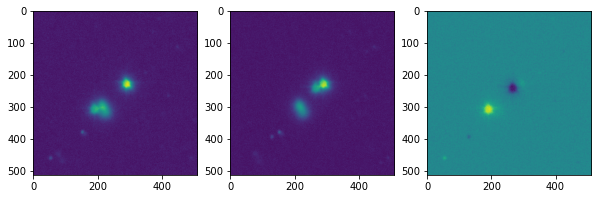

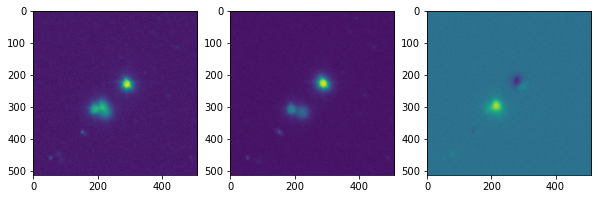

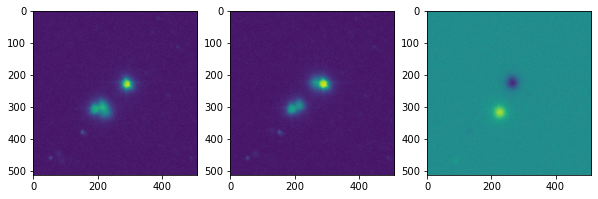

In [29]:
# Ajouter ici des cellules de code / markdown pour vos réponses
calibration(telescope, im_ex2)

# Exercice 3 : Segmentation d'une angiographie

In [30]:
im_ex3 = imageio.imread('tp3_ex3.tiff') # Image des vaisseaux sanguins
im_ex3_annotation = imageio.imread('tp3_ex3_annotation.tiff') # Annotation manuelle des vaisseaux sanguins dans une partie de l'image

In [31]:
# Ajouter ici des cellules de code / markdown pour vos réponses